In [1]:
import math 
import matplotlib_inline
import yfinance as yf 
import matplotlib.pyplot as plt 
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

<h3> Set Variables. </h3>

In [2]:
windows = [30,60,90,120] # the number of days to compute
quantiles = [0.25, 0.75] # the percentage of the top and bottom 25% of values

min_ = []
max_ = []
median = []
top_q = []
bottom_q = []
realized = []

In [3]:
# gather data 
data = yf.download("SPY", start = "2022-04-12", end = "2023-04-14") #! Timeframe is import to change to Vizualize its current historical postion

#Realized Volatility 

def realized_Volatility(price_data, window = 30):
    log_return = (price_data["Close"] / price_data["Close"].shift(1)).apply(np.log)
    
    return log_return.rolling(window = window, center = False).std() * math.sqrt(252)

""" Loop through each of the windows and compute realzied volatility over each time frame"""
for window in windows:
    # get a dataframe with realized Volatility 
    estimator = realized_Volatility(window = window, price_data= data)
    
    #append the summary of stats 
    min_.append(estimator.min())
    max_.append(estimator.max())
    median.append(estimator.median())
    top_q.append(estimator.quantile(quantiles[1]))
    bottom_q.append(estimator.quantile(quantiles[0]))
    realized.append(estimator[-1])

[*********************100%***********************]  1 of 1 completed


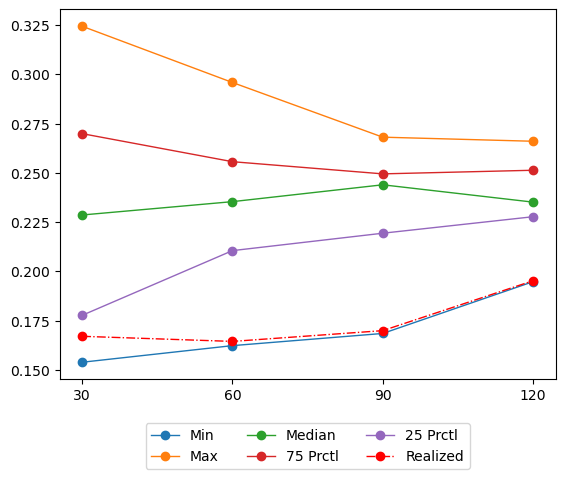

In [4]:
# create the plots on the charts 
plt.plot(windows,min_, "-o", linewidth = 1, label = "Min")
plt.plot(windows,max_, "-o", linewidth = 1, label = "Max")
plt.plot(windows,median, "-o", linewidth = 1, label = "Median")
plt.plot(windows,top_q, "-o", linewidth = 1, label = f"{quantiles[1] * 100:.0f} Prctl")
plt.plot(windows,bottom_q, "-o", linewidth = 1, label = f"{quantiles[0] * 100:.0f} Prctl")
plt.plot(windows,realized, "ro-.", linewidth = 1, label = "Realized")

# set the x-axis labels 
plt.xticks(windows)

#format the legend 
plt.legend(loc = "upper center", bbox_to_anchor=(0.5, -0.1), ncol = 3)

In [5]:
import plotly.graph_objs as go

# create traces for each data series
trace1 = go.Scatter(x=windows, y=min_, mode='lines', line=dict(color = "Purple",dash='dash'), name='Min')
trace2 = go.Scatter(x=windows, y=max_, mode='lines', line=dict(color = "red",dash='dash'), name='Max')
trace3 = go.Scatter(x=windows, y=median, mode='lines+markers',line=dict(color = "grey",dash='dash'), name='Median')
trace4 = go.Scatter(x=windows, y=top_q, mode='lines+markers',line=dict(color = "orange",dash='dash'), name=f"{quantiles[1] * 100:.0f} Prctl")
trace5 = go.Scatter(x=windows, y=bottom_q, mode='lines+markers',line=dict(color = "cornflowerblue",dash='dash'), name=f"{quantiles[0] * 100:.0f} Prctl")
trace6 = go.Scatter(x=windows, y=realized, mode='lines', line=dict(color='black'), name='Realized')

# create layout for the plot
layout = go.Layout(
    xaxis=dict(title='Window'),
    yaxis=dict(title='Volatility'),
    margin=dict(l=50, r=50, b=50, t=50),
    legend=dict(orientation='h', x=0.5, y=1.1),
)

# create figure object and add traces to it
fig = go.Figure(data=[trace1, trace2, trace3, trace4, trace5, trace6], layout=layout)

# display the plot
fig.show()


In [6]:
import plotly.graph_objs as go

# create traces for each data series
trace1 = go.Scatter3d(x=windows, y=min_, z=realized, mode='lines', line=dict(color = "Purple",dash='dash'), name='Min')
trace2 = go.Scatter3d(x=windows, y=max_, z=realized, mode='lines', line=dict(color = "red",dash='dash'), name='Max')
trace3 = go.Scatter3d(x=windows, y=median, z=realized, mode='lines+markers',line=dict(color = "grey",dash='dash'), name='Median')
trace4 = go.Scatter3d(x=windows, y=top_q, z=realized, mode='lines+markers',line=dict(color = "orange",dash='dash'), name=f"{quantiles[1] * 100:.0f} Prctl")
trace5 = go.Scatter3d(x=windows, y=bottom_q, z=realized, mode='lines+markers',line=dict(color = "cornflowerblue",dash='dash'), name=f"{quantiles[0] * 100:.0f} Prctl")
trace6 = go.Scatter3d(x=windows, y=realized, z=realized, mode='lines', line=dict(color='black'), name='Realized')

# create layout for the plot
layout = go.Layout(
    title='3D Volatility Plot',
    scene=dict(
        xaxis=dict(title='Window'),
        yaxis=dict(title='Volatility'),
        zaxis=dict(title='Value')
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

# create figure object and add traces to it
fig = go.Figure(data=[trace1, trace2, trace3, trace4, trace5, trace6], layout=layout)

# display the plot
fig.show()

